# LSMA Final Project

## 1 - Data Loading and preprocessing

### Paths definition and basic tests

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Dataset loading 
dataset_location = "/content/gdrive/My Drive/LSMA_FINAL_Project/datasets/"

# image_1 =  "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/rgb/b1-99445_Clipped.jpg"
# image_nir = "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/nir_color/b1-99445.png"
# evi_img = "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/evi_color/b1-99445.png"
# pixel_labels = "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/GT_color/b1-99445_mask.png"


image_1 =  "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/rgb/b1-99445_Clipped.jpg"
image_nir = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/nir_color/b1-99445.png"
pixel_labels = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/GT_color/b1-99445_mask.png"
evi_img = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/evi_color/b1-99445.png"


In [ ]:
im_rgb = cv2.imread(image_1)
im_nir = cv2.imread(image_nir)
im_gt = cv2.imread(pixel_labels)
im_evi = cv2.imread(evi_img)
print(type(im_nir))
im_evi.shape

<class 'numpy.ndarray'>


(487, 880, 3)

In [ ]:
hypercube = np.dstack((im_rgb,im_nir,im_evi,im_gt))
hypercube.shape

(1, 1, 4)

In [ ]:
hypercube[0,0,:]

array([  5,   7,   8,   0, 200, 104,   0,  87, 255], dtype=uint8)

In [ ]:
im_gt[220, 1, :]


array([ 0, 60,  0], dtype=uint8)

### 1.1 Ground truth creation

In [ ]:
color_dict = {
    "vegetation": [51, 102, 102],
    "grass": [0, 255, 0],
    "path": [170, 170, 170],
    "sky": [255, 120,   0],
    "object": [0, 60, 0]
}

gt_dict = {
    0: [51, 102, 102],
    1: [0, 255, 0],
    2: [170, 170, 170],
    3: [255, 120,   0],
    4: [0, 60, 0]
}

In [ ]:
gt_dict

{0: [51, 102, 102],
 1: [0, 255, 0],
 2: [170, 170, 170],
 3: [255, 120, 0],
 4: [0, 60, 0]}

In [ ]:
def create_gt_for_images(segmented_image, name=None, save=False):
  gt_img = np.zeros((segmented_image.shape[0],segmented_image.shape[1]))
  for i in range(len(segmented_image[:,1,1])):
    for j in range(len(segmented_image[1,:,1])):
      idx = 0
      for el in list(gt_dict.values()):
        if all(segmented_image[i,j,:] == el):
          gt_img[i,j] = idx
        else:
          idx += 1
  if save and name is not None:
    np.save(f"/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/gt_files/{name}",
            gt_img)
  return gt_img

def append_bands_hypercube(img, bands_to_append):
  hypercube = np.dstack((img,bands_to_append))
  print(f"Shape of hypercube is {hypercube.shape}")
  return hypercube

In [ ]:
# Hypercube creation
gt_img = create_gt_for_images(im_gt)
hypercube = append_bands_hypercube(im_rgb,im_nir)
hypercube = append_bands_hypercube(hypercube,gt_img)

hypercube = append_bands_hypercube

In [ ]:
np.unique(gt_img)

array([0., 1., 2., 3., 4.])

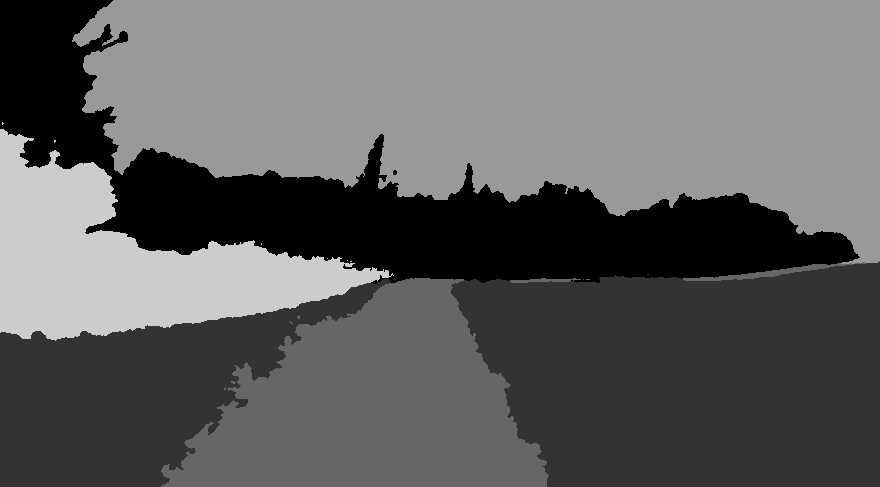

In [ ]:
from google.colab.patches import cv2_imshow
# Just ti have a better visualization we multiply to have it in range [0,255]
cv2_imshow(gt_img*(255/5))

In [ ]:
np.array([0,60,1]) == np.array(list(gt_dict.values()))

array([[False, False, False],
       [ True, False, False],
       [False, False, False],
       [False, False, False],
       [ True,  True, False]])

In [ ]:
import os
os.listdir("/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/GT_color/")
# os.listdir("/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/GT_color/")

['b34-1543_mask.png',
 'b875-908_mask.png',
 'b315-442_mask.png',
 'b342-855_mask.png',
 'b85-6986_mask.png',
 'b347-196_mask.png',
 'b75-0504_mask.png',
 'b241-386_mask.png',
 'b511-704_mask.png',
 'b265-606_mask.png',
 'b128-511_mask.png',
 'b314-513_mask.png',
 'b115-997_mask.png',
 'b69-8029_mask.png',
 'b24-5502_mask.png',
 'b551-215_mask.png',
 'b80-5434_mask.png',
 'b76-1042_mask.png',
 'b86-1078_mask.png',
 'b540-41_mask.png',
 'b150-659_mask.png',
 'b350-605_mask.png',
 'b86-045_mask.png',
 'b730-008_mask.png',
 'b145-013_mask.png',
 'b5-35681_mask.png',
 'b96-8946_mask.png',
 'b146-945_mask.png',
 'b85-1576_mask.png',
 'b4-20278_mask.png',
 'b333-41_mask.png',
 'b51-4968_mask.png',
 'b279-49_mask.png',
 'b132-658_mask.png',
 'b20-6984_mask.png',
 'b234-196_mask.png',
 'b161-308_mask.png',
 'b240-76_mask.png',
 'b360-852_mask.png',
 'b76-2943_mask.png',
 'b372-406_mask.png',
 'b112-152_mask.png',
 'b97-1436_mask.png',
 'b234-046_mask.png',
 'b205-86_mask.png',
 'b106-796_mask.

### 1.2 - Matrix and hypercube operations

In [ ]:
import glob
import os
path_segmented ="/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/GT_color/"
rgb_path = "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/rgb/"
nir_path = "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/nir_color/"
evi_path = "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/evi_color/"
gt_path = "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/gt_files/"


rgb_path = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/rgb/"
nir_path = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/nir_color/"
evi_path = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/evi_color/"
gt_path = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/gt_files/"
path_segmented ="/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/GT_color/"


# So they are taken in the same order
rgb_list = sorted(os.listdir(rgb_path))
nir_list = sorted(os.listdir(nir_path))
evi_list = sorted(os.listdir(evi_path))
gt_list = sorted(os.listdir(gt_path))

hypercubes_list = []

files = sorted(os.listdir(path_segmented))
for idx, elem in enumerate(files):
  print("Filename files: ", elem)
  if idx ==1:
    rgb_img = cv2.imread(f"{rgb_path}{rgb_list[idx]}")
    nir_img = cv2.imread(f"{nir_path}{nir_list[idx]}")
    evi_img = cv2.imread(f"{evi_path}{evi_list[idx]}")
    if gt_path: # If ground truth is already created we don't waste time in creating them (computationally demanding)
      gt_img = np.load(f"{gt_path}{gt_list[idx]}")
    else:
      img_segmented = cv2.imread(f"{path_segmented}{elem}")
      gt_img = create_gt_for_images(img_segmented,name=nir_list[idx][:-4], save=False)
    hypercube = append_bands_hypercube(rgb_img,nir_img)
    hypercube = append_bands_hypercube(hypercube,evi_img)
    hypercubes_list.append(append_bands_hypercube(hypercube,gt_img))
    

  

Filename files:  b1-99445_mask.png
Filename files:  b10-495_mask.png
Shape of hypercube is (482, 871, 6)
Shape of hypercube is (482, 871, 9)
Shape of hypercube is (482, 871, 10)
Filename files:  b102-798_mask.png
Filename files:  b103-494_mask.png
Filename files:  b103-904_mask.png
Filename files:  b106-796_mask.png
Filename files:  b107-141_mask.png
Filename files:  b108-392_mask.png
Filename files:  b109-006_mask.png
Filename files:  b109-204_mask.png
Filename files:  b112-152_mask.png
Filename files:  b113-392_mask.png
Filename files:  b114-218_mask.png
Filename files:  b115-397_mask.png
Filename files:  b115-997_mask.png
Filename files:  b116-1_mask.png
Filename files:  b116-903_mask.png
Filename files:  b117-844_mask.png
Filename files:  b118-372_mask.png
Filename files:  b119-3_mask.png
Filename files:  b121-193_mask.png
Filename files:  b122-196_mask.png
Filename files:  b125-992_mask.png
Filename files:  b128-511_mask.png
Filename files:  b128-847_mask.png
Filename files:  b130

In [ ]:
# npy_file = np.load("/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/gt_files/b1-99445.npy")
npy_file = np.load("/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/gt_files/b1-99445.npy")

In [ ]:
npy_file.shape

(487, 880)

In [ ]:
# To simplify EDA
def matricization_mode_3(hypercube):
  matrix = hypercube.transpose(2,0,1).reshape(hypercube.shape[2],-1)
  # print(f'Shape of matrix is {matrix.shape}')
  return matrix

In [ ]:
# Test matricization matrix
hypercube = hypercubes_list[0]
matrix_pca = matricization_mode_3(hypercube)
matrix_pca.shape

(10, 428560)

In [ ]:
hypercube.shape

(487, 880, 10)

## 2 - EDA: Exploratory data analysis

### 2.1 - Pca Explained Variance

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [ ]:
def pca(matrix_pca, n_comp = 2):
  std_slc = StandardScaler()
  X = matrix_pca[:-1, :]
  std_slc.fit(X)
  X_scaled = std_slc.transform(X)
  n_components = matrix_pca.shape[0] - 1
  pca = decomposition.PCA(n_components=n_components)
  X_std_pca = pca.fit(X_scaled)
  explained_variance = pca.explained_variance_ratio_
 

  return  bands_pca

In [ ]:
std_slc = StandardScaler()

X = matrix_pca[:-1, :]
std_slc.fit(X)
X_scaled = std_slc.transform(X)
n_components = matrix_pca.shape[0] - 1
pca = decomposition.PCA(n_components=n_components)
X_std_pca = pca.fit(X_scaled)
X_std_pca

PCA(n_components=9)

In [ ]:
def PCA_matrix(matrix_pca):
  X = matrix_pca[:-1, :]
  std_slc.fit(X)
  X_scaled = std_slc.transform(X)
  n_components = matrix_pca.shape[0] - 1
  pca = decomposition.PCA(n_components=n_components)
  X_std_pca = pca.fit(X_scaled)

The explained variance of the first 3 components is:  0.9227467480729945


Text(0, 0.5, 'Cumulative explained variance')

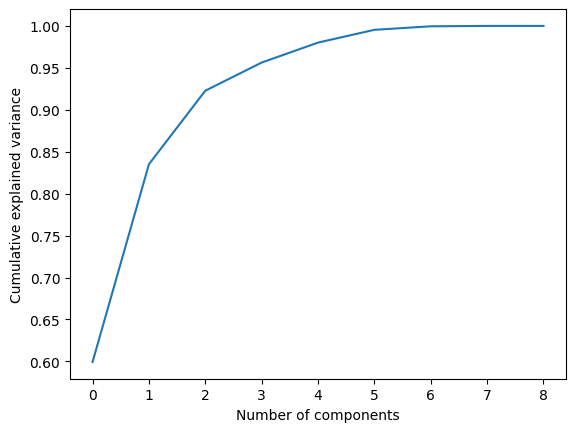

In [ ]:
# With 2 components we can explain more than 90% of the data
comps_to_keep = 3
print("The explained variance of the first", comps_to_keep ,"components is: ", sum(pca.explained_variance_ratio_[:comps_to_keep]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model

In [ ]:
def calc_mse_mae(preds, y_test):
    MSE=mean_squared_error(predictions, y_test)
    MAE=mean_absolute_error(predictions, y_test)
    print('Mean squared Error: ', MSE, ' Mean Absolute Error: ', MAE)

Mean squared Error:  1.2485979051651033  Mean Absolute Error:  0.767241612888531
Coefficients: [[0.00754241]]


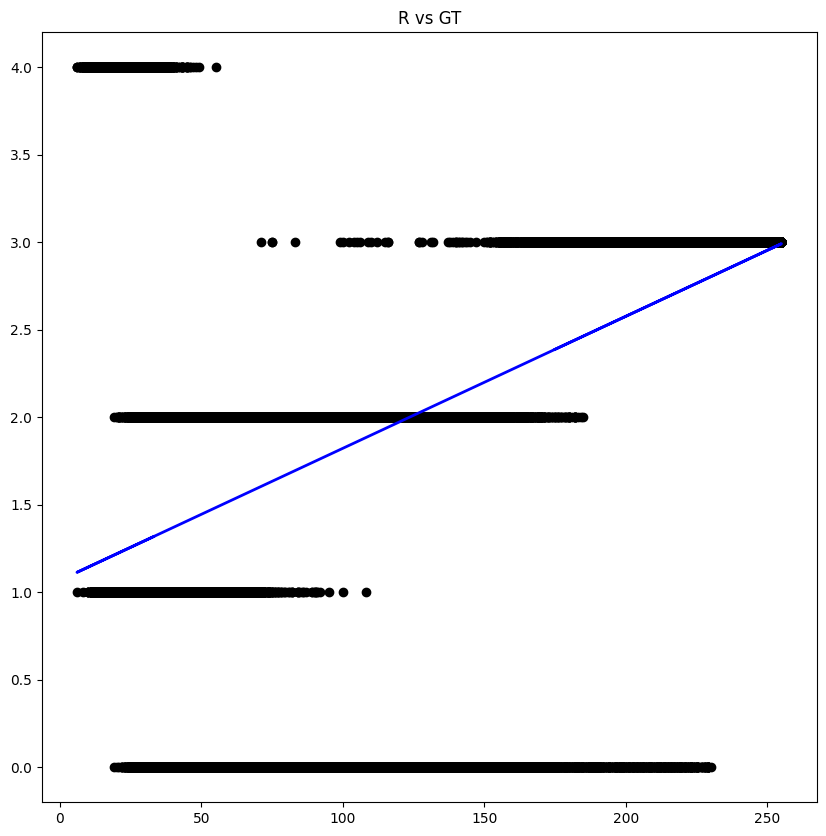

Mean squared Error:  1.3892218106541065  Mean Absolute Error:  0.8926777478756758
Coefficients: [[0.00747125]]


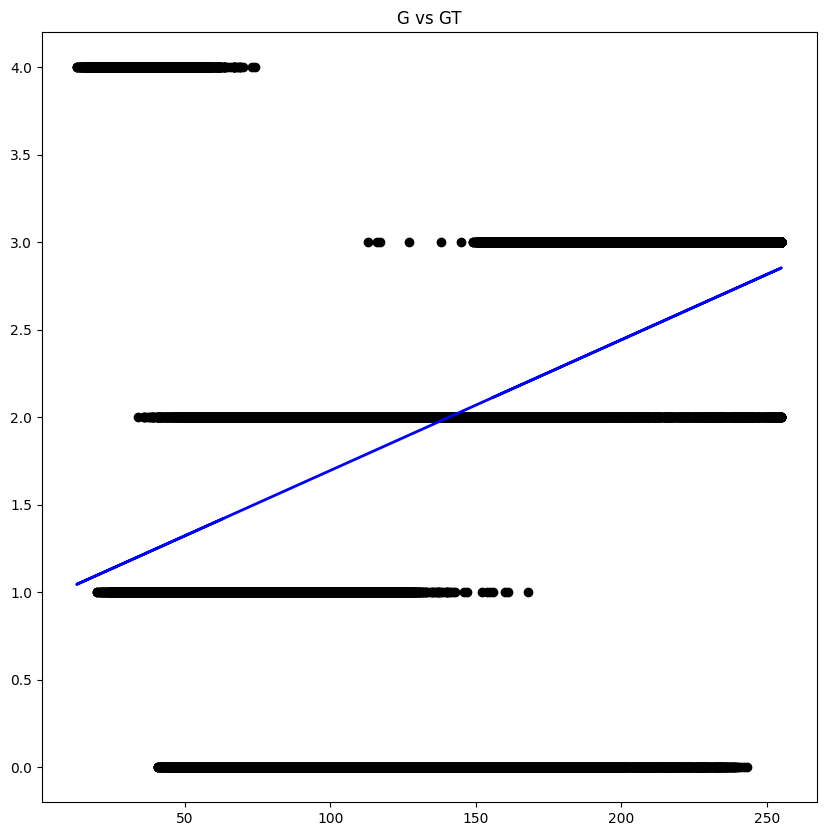

Mean squared Error:  1.5633610166461587  Mean Absolute Error:  1.0563983482990762
Coefficients: [[0.0046331]]


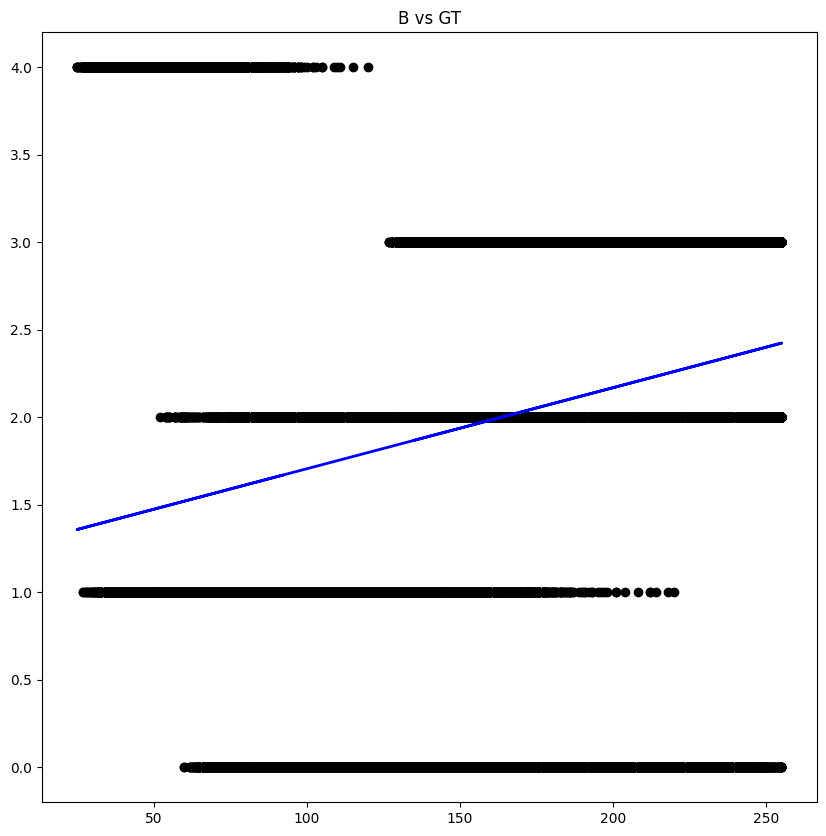

Mean squared Error:  1.3313343720802584  Mean Absolute Error:  0.9241018898534238
Coefficients: [[0.00564104]]


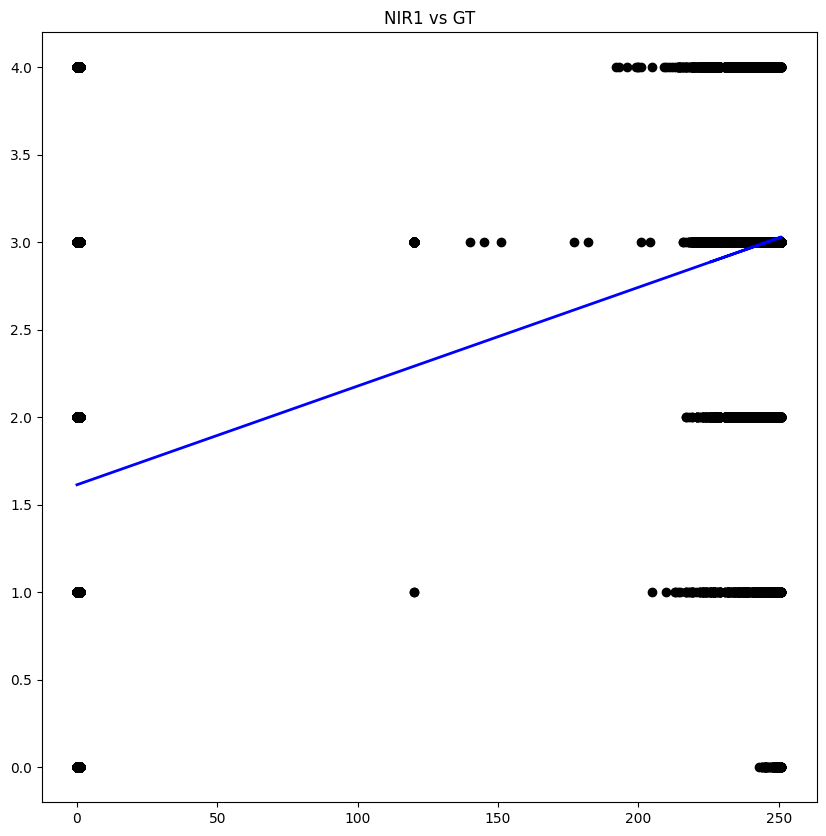

Mean squared Error:  1.476216332846937  Mean Absolute Error:  1.000080765831315
Coefficients: [[0.00635318]]


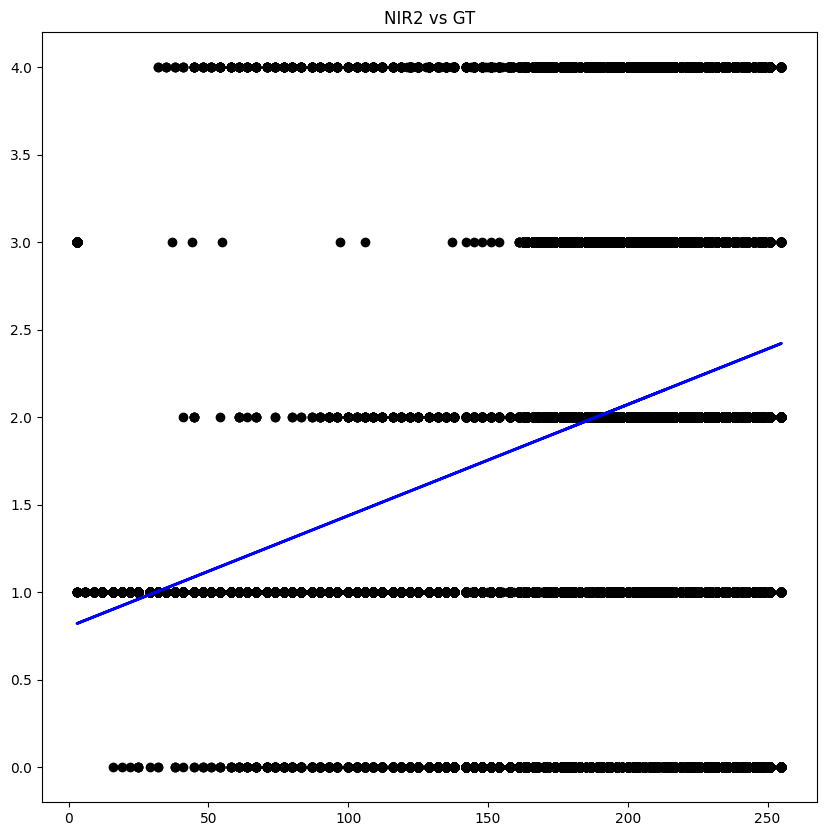

Mean squared Error:  0.9634385389289054  Mean Absolute Error:  0.6541299335282468
Coefficients: [[-0.00774155]]


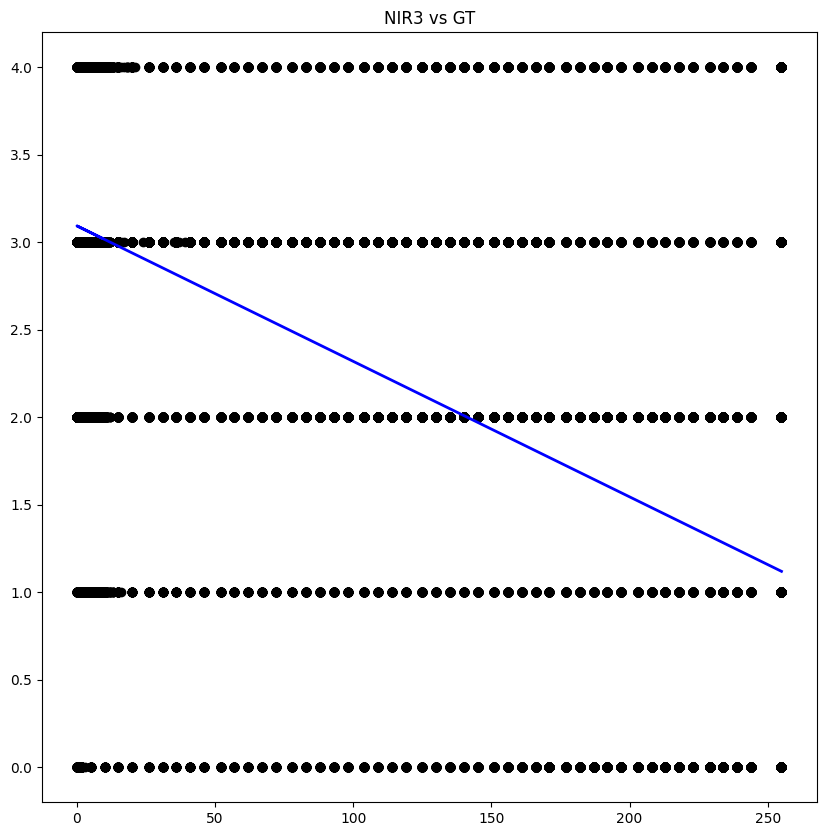

Mean squared Error:  1.2476000275841095  Mean Absolute Error:  0.8278539156198854
Coefficients: [[0.00601867]]


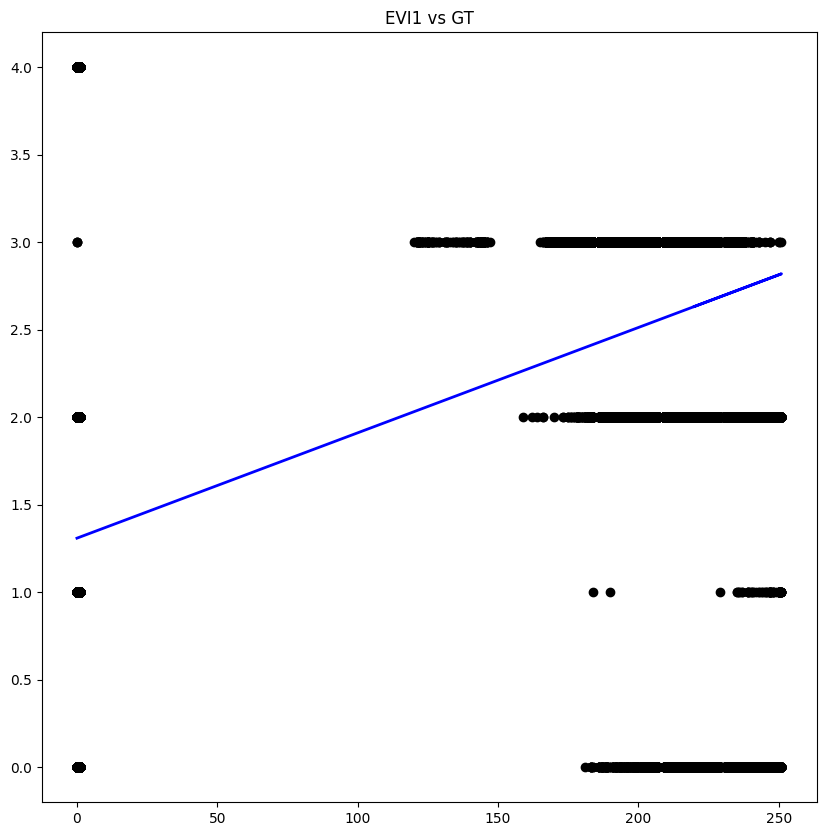

Mean squared Error:  1.3587478430681745  Mean Absolute Error:  0.9719249777499375
Coefficients: [[-0.01145637]]


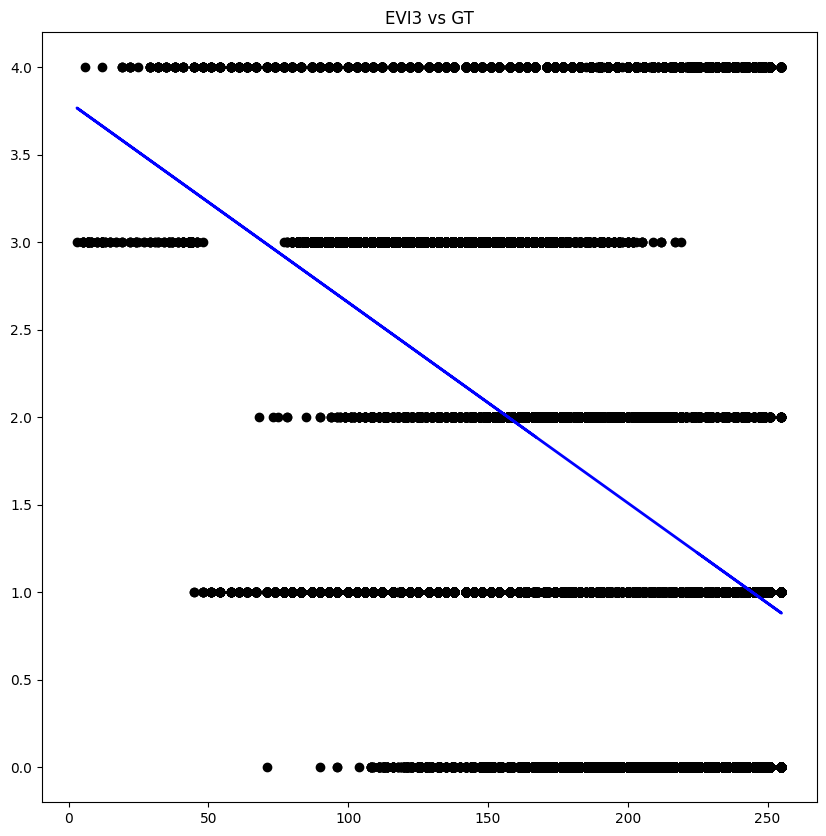

Mean squared Error:  1.3701292687397315  Mean Absolute Error:  0.8883412331067093
Coefficients: [[-0.00453917]]


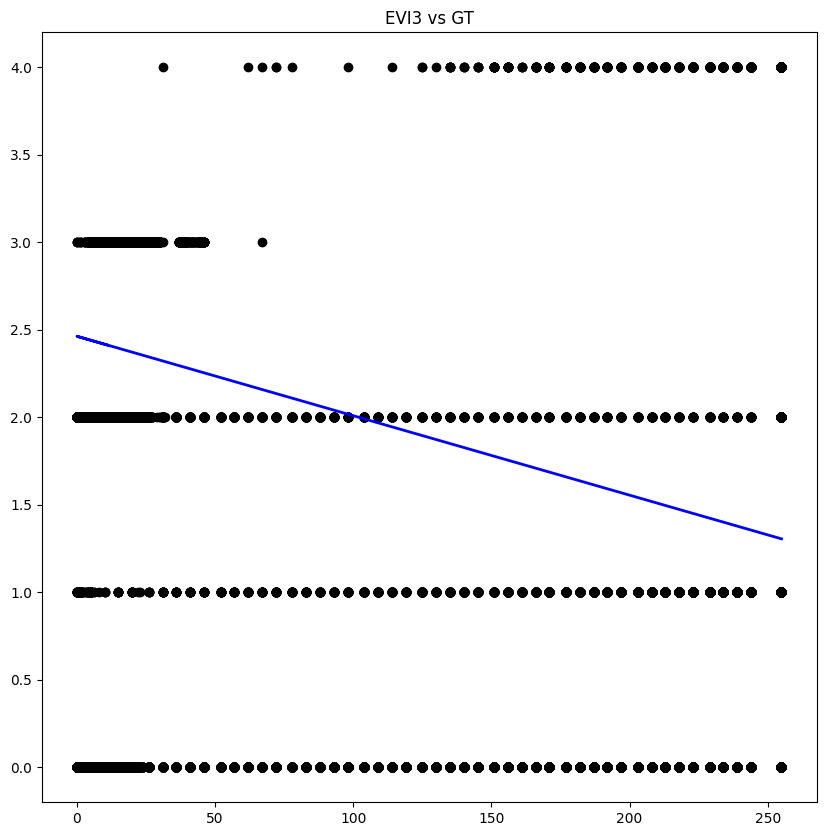

In [ ]:
features = ['R','G', 'B', 'NIR1', 'NIR2', 'NIR3','EVI1','EVI3','EVI3']
Y = matrix_pca[-1, :]
model= linear_model.LinearRegression()

for i, feat in enumerate(features):
  if len(features) == X.shape[0]:
      X_train, X_test, y_train, y_test = train_test_split(np.transpose(X[i,:]), np.squeeze(Y), test_size=0.2, random_state=1234)
      X_train = X_train.reshape(-1,1)
      y_train = y_train.reshape(-1,1)
      trained_model=model.fit(X_train, y_train)
      X_test = X_test.reshape(-1,1)
      predictions = trained_model.predict(X_test)

      calc_mse_mae(predictions, y_test)
      print(f"Coefficients: {trained_model.coef_}")

      plt.figure(figsize=(10, 10))
      plt.scatter(X_test, np.squeeze(y_test), color="black")
      plt.plot(X_test, predictions, color="blue", linewidth=2)
      plt.title(f"{feat} vs GT")
      plt.show()

In [ ]:
 X.shape[0]

9

In [ ]:
from sklearn.preprocessing import MinMaxScaler

hypercube_bands_scaled = np.zeros((hypercube.shape[0], hypercube.shape[1], hypercube.shape[2]-1))

def scale_bands(hypercube):

  scaler = MinMaxScaler(feature_range=(0, 1))

  for i in range(hypercube.shape[-1]-1):
    band = hypercube[:, :, i]
    band_scaled = scaler.fit_transform(band.reshape(-1, 1)).reshape(band.shape)
    hypercube_bands_scaled[:, :, i] = band_scaled
  
  return hypercube_bands_scaled


In [ ]:
hypercube_bands_scaled = scale_bands(hypercube)
hypercube_bands_scaled.shape

(487, 880, 9)

In [ ]:
from sklearn.decomposition import PCA

def pca(hypercube_bands, n_comp = 2):
  bands_2d = hypercube_bands.reshape(-1, hypercube_bands.shape[2]) 
  pca = PCA(n_components=n_comp).fit(bands_2d)
  bands_pca = pca.transform(bands_2d)
  bands_pca = bands_pca.reshape(hypercube_bands.shape[0], hypercube_bands.shape[1], -1)
  explained_variance = pca.explained_variance_ratio_
  print("The explained variance of the first", n_comp ,"components is: ",explained_variance)

  return  bands_pca

In [ ]:
bands_pca = pca(hypercube_bands_scaled, n_comp=9)
bands_pca.shape

The explained variance of the first 9 components is:  [6.77846830e-01 1.57514225e-01 6.45631781e-02 3.62875163e-02
 2.84847132e-02 1.72839297e-02 1.39679050e-02 3.71830040e-03
 3.33402424e-04]


(487, 880, 9)

This is what we should use, and we have to apply the same transformation to all images and then use the descriptor, which are the combination of the 3 most relevant bands of the pca.

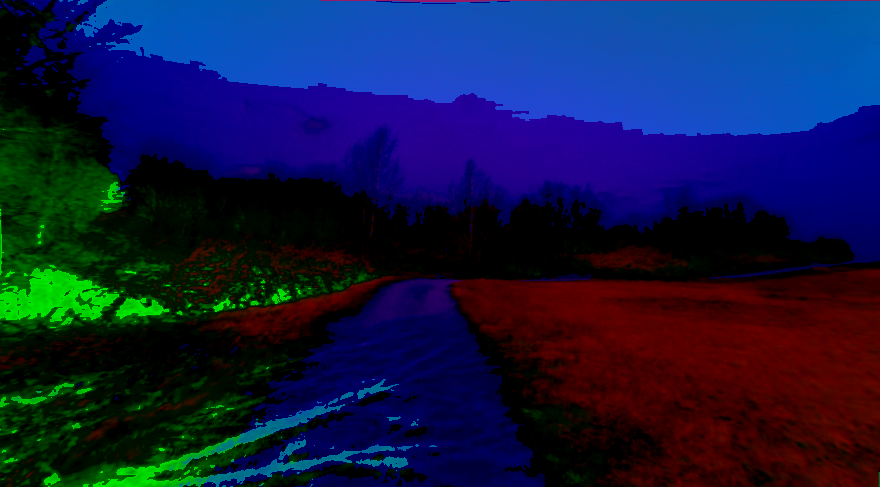

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(bands_pca[:,:,:3]*170)

In [ ]:
def get_hypercube(gt_file, bands_to_append):
    hypercube = gt_file
    for band in bands_to_append:
      hypercube = append_bands_hypercube(hypercube,band)

    return hypercube

In [ ]:
rgb_path = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/rgb/"
nir_path = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/nir_color/"
evi_path = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/evi_color/"
path_gt_files = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/gt_files/"

gt_files = sorted(os.listdir(path_gt_files))
rgb_files = sorted(os.listdir(rgb_path))
nir_files = sorted(os.listdir(nir_path))
evi_files = sorted(os.listdir(evi_path))

hypercubes_list = []

for idx in range(50):
      gt_file = gt_files[idx]
      bands_to_append = []
      gt = np.load(os.path.join(path_gt_files, gt_file)) 
      rgb = cv2.imread(f"{rgb_path}{rgb_files[idx]}")
      nir = cv2.imread(f"{nir_path}{nir_files[idx]}")
      evi = cv2.imread(f"{evi_path}{evi_files[idx]}")

      for i in range(rgb.shape[2]):
        bands_to_append.append(rgb[:,:,i])
      for i in range(rgb.shape[2]):
        bands_to_append.append(nir[:,:,i])
      for i in range(rgb.shape[2]):
        bands_to_append.append(evi[:,:,i])

      hypercube = get_hypercube(gt, bands_to_append)
      hypercubes_list.append(hypercube)



percentage of pixels over all images

In [ ]:
pixel_values = [0, 1, 2, 3, 4]

pixel_counts = {p: 0 for p in pixel_values}

for gt_file in os.listdir(path_gt_files):
    gt = np.load(os.path.join(path_gt_files, gt_file)) 
    for p in pixel_values:
        pixel_counts[p] += np.sum(gt == p)

total_pixels = sum(pixel_counts.values())

for p in pixel_values:
    percent_pixels_per_class = 100 * pixel_counts[p] / total_pixels
    print("{:.2f}% of total pixels in class {}".format(percent_pixels_per_class, p))


39.58% of total pixels in class 0
26.19% of total pixels in class 1
9.61% of total pixels in class 2
23.29% of total pixels in class 3
1.33% of total pixels in class 4


## 2.2 - Correlation matrices

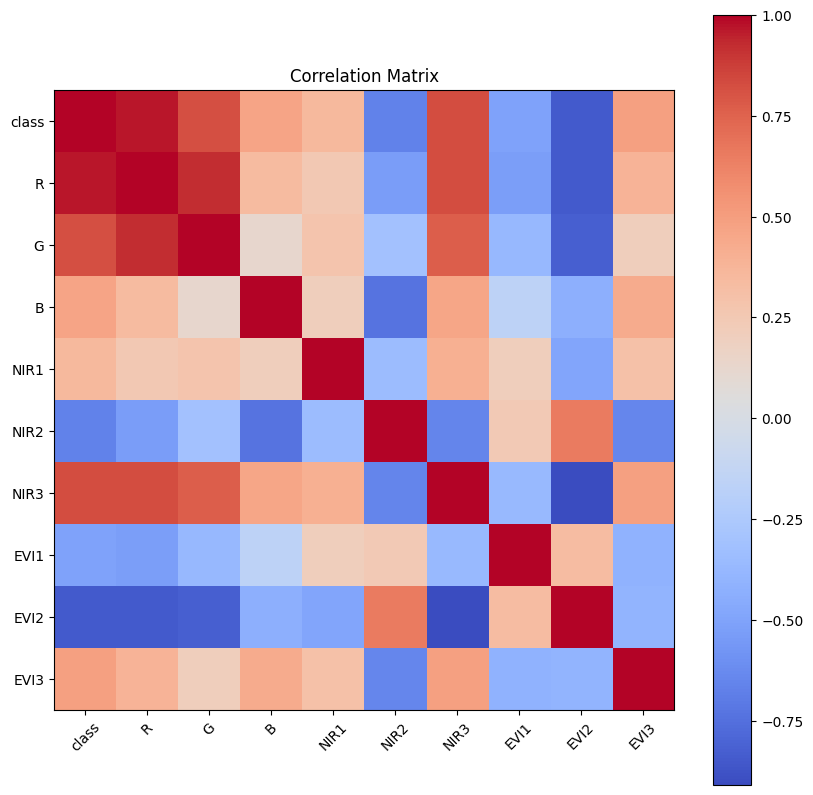

In [ ]:
features = ['class', 'R', 'G', 'B', 'NIR1', 'NIR2', 'NIR3', 'EVI1', 'EVI2', 'EVI3']
hypercube = hypercubes_list[0]
matrix_pca = matricization_mode_3(hypercube)
corr_matrix = np.corrcoef(matrix_pca)

plt.figure(figsize=(10, 10))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=45)
plt.yticks(range(len(features)), features)
plt.title('Correlation Matrix')
plt.show()


Shape of matrix is (10, 413470)


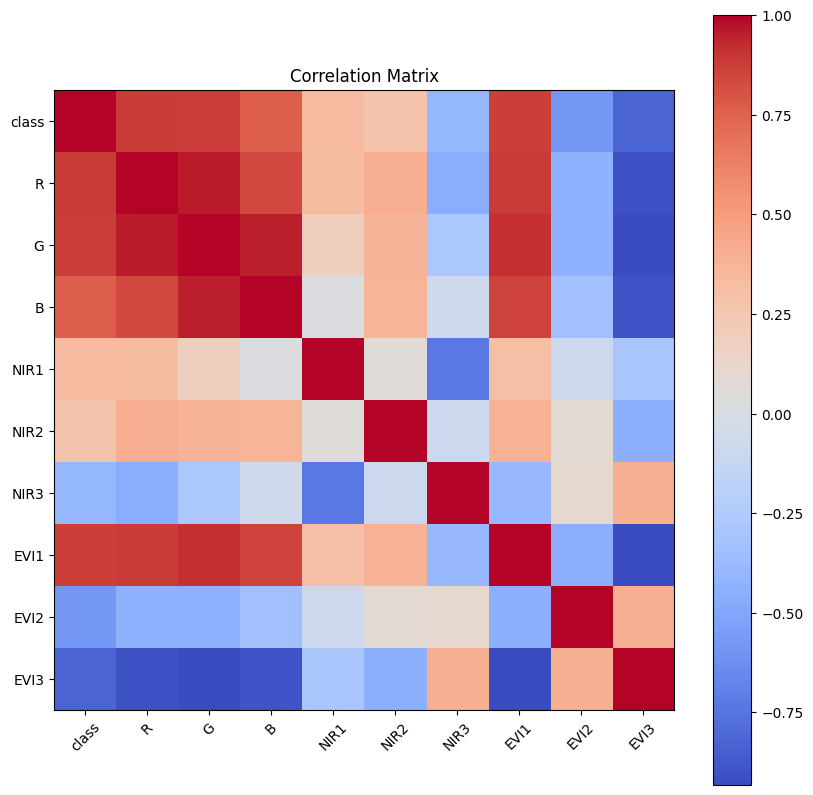

In [ ]:
features = ['class', 'R', 'G', 'B', 'NIR1', 'NIR2', 'NIR3', 'EVI1', 'EVI2', 'EVI3']
hypercube = hypercubes_list[25]
matrix_pca = matricization_mode_3(hypercube)
corr_matrix = np.corrcoef(matrix_pca)

plt.figure(figsize=(10, 10))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=45)
plt.yticks(range(len(features)), features)
plt.title('Correlation Matrix')
plt.show()


PCA over 50 images

In [ ]:
matrices_pca_list = []
for elem in hypercubes_list:
  matrix_pca = matricization_mode_3(elem)
  matrices_pca_list.append(matrix_pca)

images_pca = np.hstack(matrices_pca_list)

In [ ]:
images_pca.shape

(10, 20903190)

In [ ]:
std_slc = StandardScaler()

X = images_pca[1:, :]
std_slc.fit(X)
X_scaled = std_slc.transform(X)
n_components = images_pca.shape[0] - 1
pca = decomposition.PCA(n_components=n_components)
X_std_pca = pca.fit(X_scaled)

The explained variance of the first 3 components is:  0.9184990128946068


Text(0, 0.5, 'Cumulative explained variance')

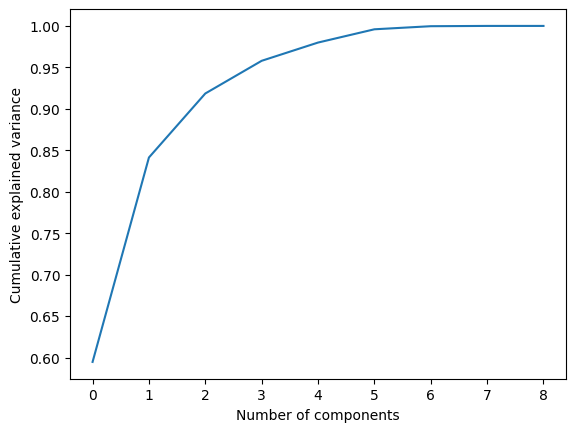

In [ ]:
comps_to_keep = 3
print("The explained variance of the first", comps_to_keep ,"components is: ", sum(pca.explained_variance_ratio_[:comps_to_keep]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

corr matrix over 50 images

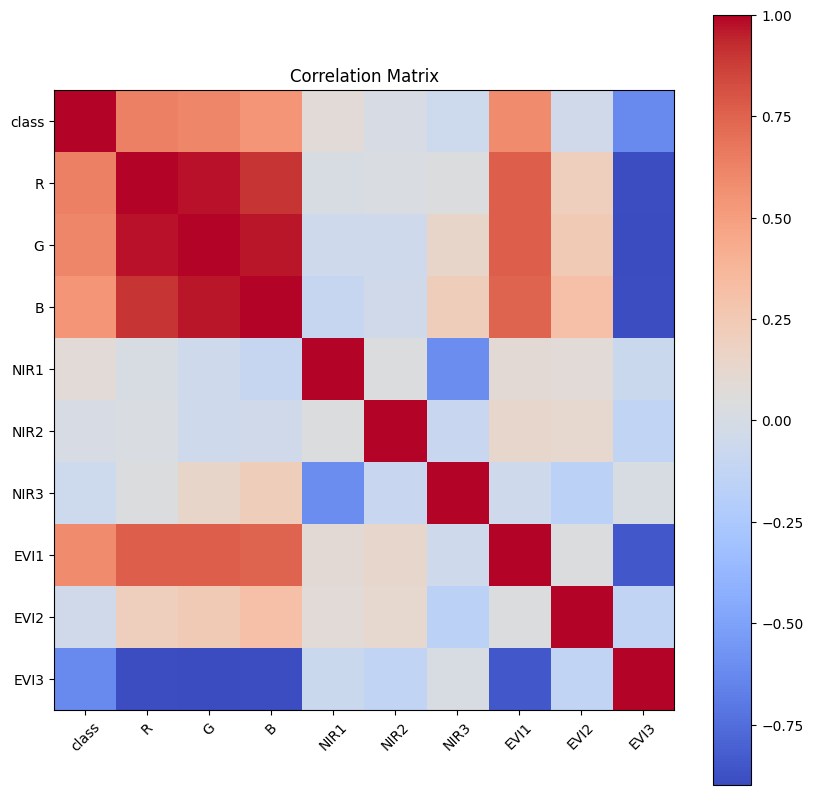

In [ ]:
matrices_pca_list = []
for elem in hypercubes_list:
  matrix_pca = matricization_mode_3(elem)
  matrices_pca_list.append(matrix_pca)

images_pca = np.hstack(matrices_pca_list)

features = ['class', 'R', 'G', 'B', 'NIR1', 'NIR2', 'NIR3', 'EVI1', 'EVI2', 'EVI3']

corr_matrix = np.corrcoef(images_pca)

plt.figure(figsize=(10, 10))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=45)
plt.yticks(range(len(features)), features)
plt.title('Correlation Matrix')
plt.show()




## 3 - Using descriptors for segmenting images

May be you need to remove things like the self and stuff like that. Simply give a hypercube to it, (a full one if possible even though I think it should work with a simple RGB image) and gt_value is one from 0 to 4 depending on the class you want to extract. It will return you a 3x(NumberOfPixelsOfThatClass)

In [ ]:
class RGBHistogram:
	def __init__(self, bins):
		# store the number of bins the histogram will use
		self.bins = bins

	def describe(self, image):
		# compute a 3D histogram in the RGB colorspace
		hist = cv2.calcHist([image], [0, 1, 2],
			None, self.bins, [0, 256, 0, 256, 0, 256])
  	# normalize the histogram so that images
		# with the same content, but either scaled larger
		# or smaller will have (roughly) the same histogra
		hist = cv2.normalize(hist,hist)

		# return out 3D histogram as a flattened array
		return hist.flatten()

In [ ]:
import imutils
class LabHistogram:
    def __init__(self, bins):
        # store the number of bins for the histogram
        self.bins = bins

    def describe(self, image, mask=None):
        # convert the image to the La* color space, compute a histogram,
        # and normalize it
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        hist = cv2.calcHist([lab], [0, 1, 2], mask, self.bins,
            [0, 256, 0, 256, 0, 256])

        # handle if we are calculating the histogram for OpenCV 2.4
        if imutils.is_cv2():
            hist = cv2.normalize(hist).flatten()

        # otherwise, we are creating the histogram for OpenCV 3+
        else:
            hist = cv2.normalize(hist,hist).flatten()

        # return the histogram
        return hist

In [ ]:
def get_pixels_from_gt(hypercube, gt_value):
        '''
        At first focused on hypercubes and takes pixel values corresponding to the specified gt value on the image
        '''
        gt_values = np.unique(hypercube[:,:,-1])
        # TODO: Could be generalized for different datasets
        if len(gt_values) > 5:
            raise Exception("Error: More classes than expected")
        matrix = matricization_mode_3(hypercube)
        pixels_gt = np.zeros((3,1))
        for i in range(matrix.shape[1]):
            if int(matrix[-1,i]) == gt_value and isinstance(gt_value,int):
                if not np.any(pixels_gt):
                    pixels_gt = matrix[0:3,i]
                else:
                    pixels_gt = np.vstack((pixels_gt, matrix[0:3,i]))
        return pixels_gt

In [ ]:
def segmentate_using_descriptors(hypercube, descriptor, features_list, mode="rgb",
                                  save = False, name=None):
    '''
    Create segmentation image using the specified descriptor
    '''
    segmentation = np.zeros((hypercube.shape[0], hypercube.shape[1]))
    for i in range(hypercube.shape[0]):
        for j in range (hypercube.shape[1]):
            differences = []
            pixel_val = hypercube[i,j,0:3]
            pixel = Image.fromarray(np.uint8(pixel_val * 255))
            pixel.save('/content/pixel_aux.png')
            pix_img = '/content/pixel_aux.png'
            img_pix = cv2.imread(pix_img)
            features_pixel = descriptor.describe(img_pix)
            for feature in features_list:
                desc_difference = np.abs(feature - features_pixel)
                differences.append(desc_difference)
            sums = [np.sum(diff) for diff in differences]
            class_index = np.argmin(sums)
            segmentation[i, j] = class_index
    if save and name is not None:
        segmentation_aux = Image.fromarray(np.uint8(segmentation * (255/5)))
        segmentation_aux.save(f'/content/segmentation_{name}.png')
    return segmentation


In [ ]:
def translate_from_gt_to_rgb(gt_image, save=False, name=None):
        '''
        Translate from our grayscale image to our dictionary
        '''
        rgb_gt = np.zeros(gt_image.shape)
        if np.max(gt_image) >= 204:
            gt_image = gt_image*(5/255)
        for i in range(len(gt_image[:,1,1])):
            for j in range(len(gt_image[1,:,1])):
                gt_px = gt_image[i,j,:]
                rgb_gt[i,j,:] = np.array(gt_dict[int(gt_px[0])])
        if save and name is not None:
            # rgb_aux = Image.fromarray(np.uint8(rgb_gt))
            cv2.imwrite(f'/content/img_gt_{name}.png', rgb_gt)
        return rgb_gt

In [ ]:
def get_accuracy(ideal_gt, segmented_img):
  n_pixels = ideal_gt.shape[0] * ideal_gt.shape[1]
  n_correct = 0
  for i in range(ideal_gt.shape[0]):
    for j in range(ideal_gt.shape[1]):
        if (ideal_gt[i, j, :] == segmented_img[i, j, :]).all():
            n_correct += 1

  accuracy = n_correct / n_pixels * 100

  print("Accuracy: ")

  return accuracy

In [ ]:
pixels_0 = get_pixels_from_gt(hypercube=hypercube, gt_value=0)
pixels_1 = get_pixels_from_gt(hypercube=hypercube, gt_value=1)
pixels_2 = get_pixels_from_gt(hypercube=hypercube, gt_value=2)
pixels_3 = get_pixels_from_gt(hypercube=hypercube, gt_value=3)
pixels_4 = get_pixels_from_gt(hypercube=hypercube, gt_value=4)


In [ ]:
from PIL import Image

pixel_0_img = Image.fromarray(np.uint8(pixels_0 * 255))
pixel_0_img.save('pixel_0_img.png')

pixel_1_img = Image.fromarray(np.uint8(pixels_1 * 255))
pixel_1_img.save('pixel_1_img.png')

pixel_2_img = Image.fromarray(np.uint8(pixels_2 * 255))
pixel_2_img.save('pixel_2_img.png')

pixel_3_img = Image.fromarray(np.uint8(pixels_3 * 255))
pixel_3_img.save('pixel_3_img.png')

pixel_4_img = Image.fromarray(np.uint8(pixels_4 * 255))
pixel_4_img.save('pixel_4_img.png')

### RGB

**RGB Histogram**

In [ ]:
GT_VALUES = [0, 1, 2, 3, 4]
# An example of how I use it
img_label_list = []
for i in GT_VALUES:
    img  = cv2.imread(f"pixel_{i}_img.png")
    img_label_list.append(img)
features_list = []
desc = RGBHistogram([8, 8, 8])
for el in img_label_list:
    features_list.append(desc.describe(el))
segmentation = segmentate_using_descriptors(hypercube, desc, features_list, save=True, name="rgb_desc")

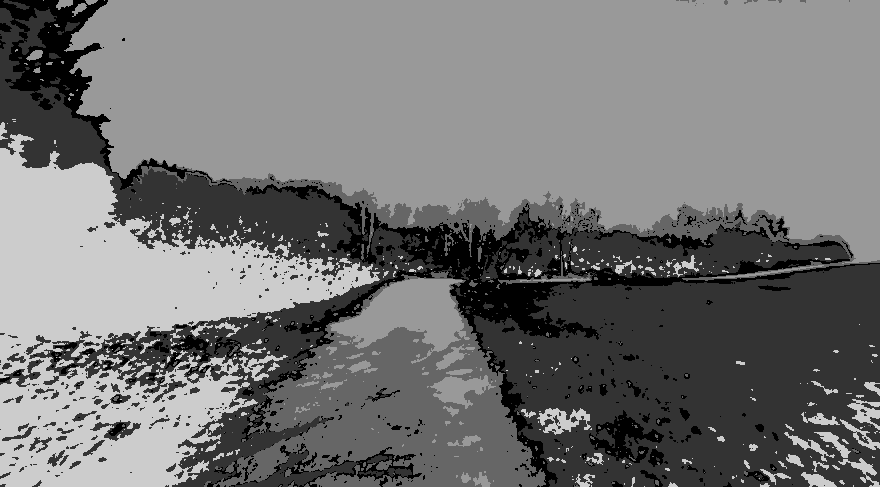

In [ ]:
cv2_imshow(segmentation*255/5)

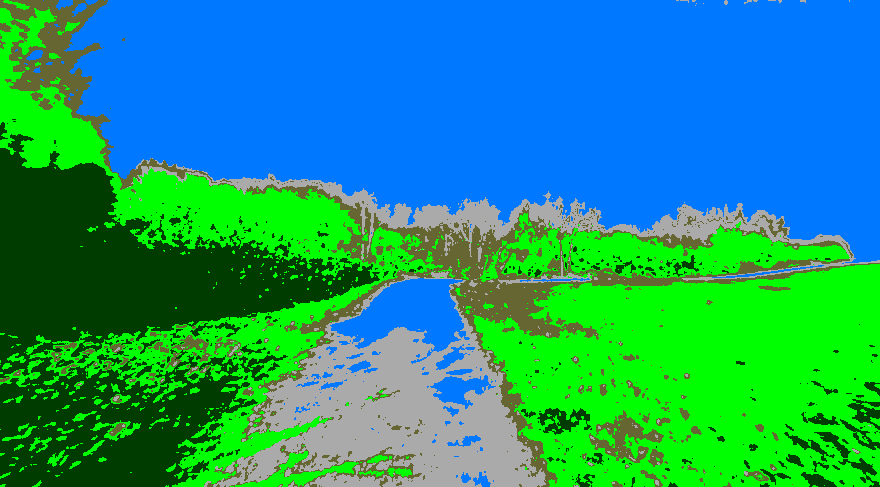

In [ ]:
rgb_desc_name = "/content/segmentation_rgb_desc.png"
gt_image = cv2.imread(rgb_desc_name)
rgb_image = translate_from_gt_to_rgb(gt_image, save=True, name="rgb_desc")
cv2_imshow(rgb_image)

In [ ]:
true_labels =  cv2.imread(pixel_labels)
get_accuracy(true_labels, rgb_image)

Accuracy: 


71.92388463692365

**Lab Histogram**

In [ ]:
GT_VALUES = [0, 1, 2, 3, 4]
# An example of how I use it
img_label_list = []
for i in GT_VALUES:
    img  = cv2.imread(f"pixel_{i}_img.png")
    img_label_list.append(img)
features_list = []
desc = LabHistogram([8, 8, 8])
for el in img_label_list:
    features_list.append(desc.describe(el))
segmentation = segmentate_using_descriptors(hypercube, desc, features_list, save=True, name="lab_desc")

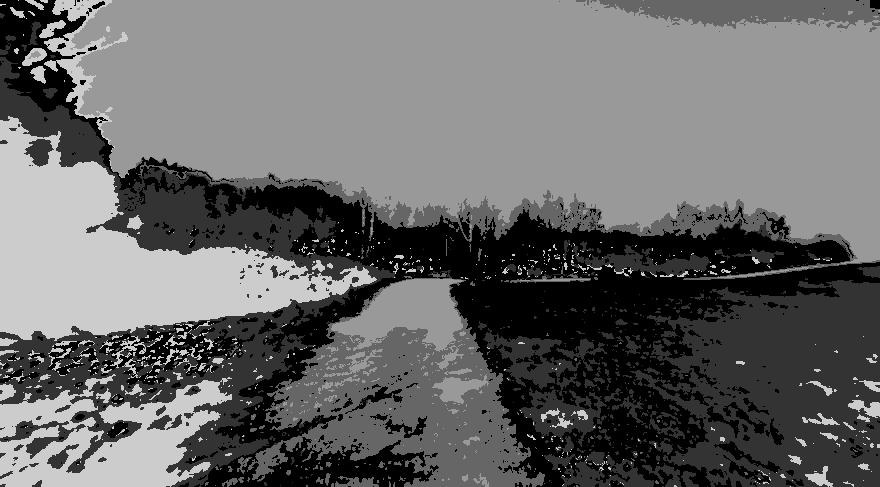

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(segmentation*255/5)

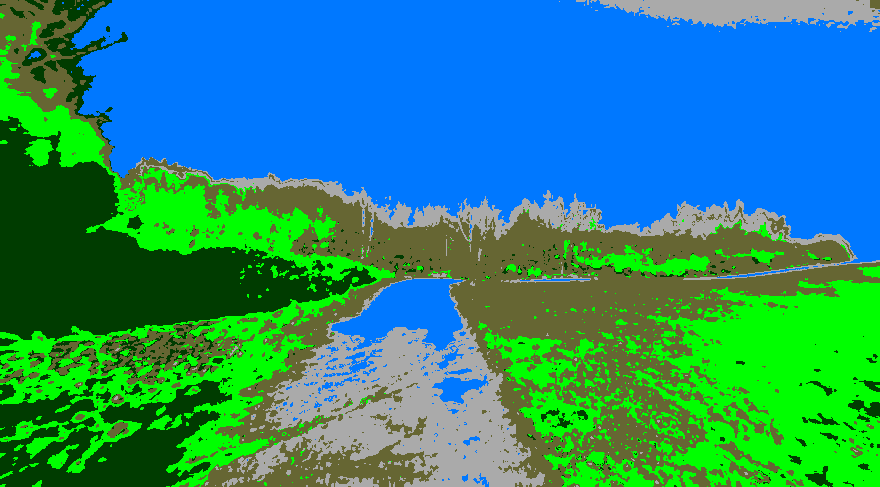

In [ ]:
lab_desc_name = "/content/segmentation_lab_desc.png"
gt_image = cv2.imread(lab_desc_name)
lab_image = translate_from_gt_to_rgb(gt_image, save=True, name="lab_desc")
cv2_imshow(lab_image)

In [ ]:
true_labels =  cv2.imread(pixel_labels)
get_accuracy(true_labels, lab_image)

Accuracy: 


24.45071868583162

### 3 PCA

In [ ]:
three_bands_pca = bands_pca[:,:,:3]
hypercube_pca = append_bands_hypercube(three_bands_pca, gt_img)


Shape of hypercube is (487, 880, 4)


(487, 880, 4)

In [ ]:
pixels_0 = get_pixels_from_gt(hypercube=hypercube_pca, gt_value=0)
pixels_1 = get_pixels_from_gt(hypercube=hypercube_pca, gt_value=1)
pixels_2 = get_pixels_from_gt(hypercube=hypercube_pca, gt_value=2)
pixels_3 = get_pixels_from_gt(hypercube=hypercube_pca, gt_value=3)
pixels_4 = get_pixels_from_gt(hypercube=hypercube_pca, gt_value=4)


In [ ]:
from PIL import Image

pixel_0_img = Image.fromarray(np.uint8(pixels_0 * 255))
pixel_0_img.save('pixel_0_img.png')

pixel_1_img = Image.fromarray(np.uint8(pixels_1 * 255))
pixel_1_img.save('pixel_1_img.png')

pixel_2_img = Image.fromarray(np.uint8(pixels_2 * 255))
pixel_2_img.save('pixel_2_img.png')

pixel_3_img = Image.fromarray(np.uint8(pixels_3 * 255))
pixel_3_img.save('pixel_3_img.png')

pixel_4_img = Image.fromarray(np.uint8(pixels_4 * 255))
pixel_4_img.save('pixel_4_img.png')

**RGB**

In [ ]:
GT_VALUES = [0, 1, 2, 3, 4]
# An example of how I use it
img_label_list = []
for i in GT_VALUES:
    img  = cv2.imread(f"pixel_{i}_img.png")
    img_label_list.append(img)
features_list = []
desc = RGBHistogram([8, 8, 8])
for el in img_label_list:
    features_list.append(desc.describe(el))
segmentation = segmentate_using_descriptors(hypercube_pca, desc, features_list, save=True, name="rgb_desc")

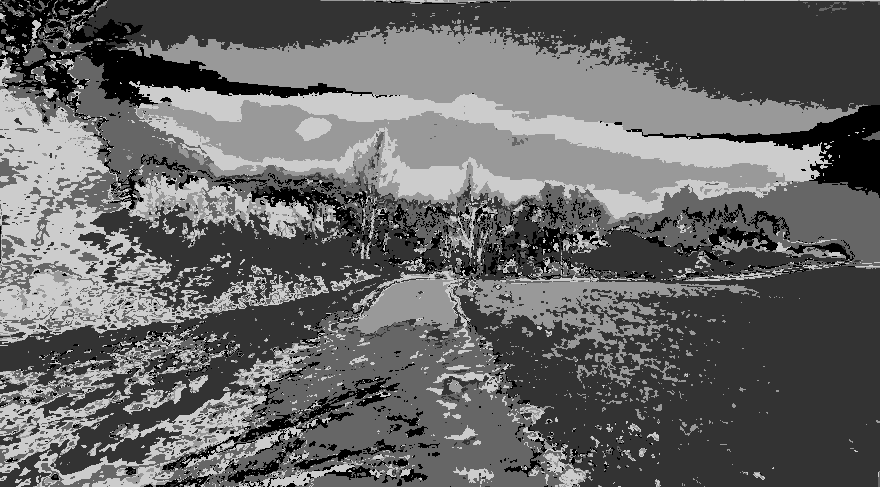

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(segmentation*255/5)

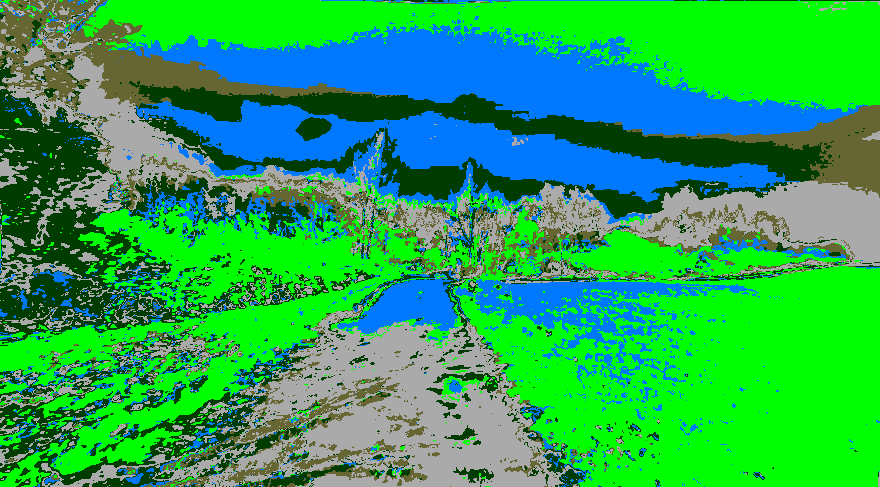

In [ ]:
rgb_desc_name = "/content/segmentation_rgb_desc.png"
gt_img = cv2.imread(rgb_desc_name)
rgb_image = translate_from_gt_to_rgb(gt_img, save=True, name="rgb_desc")
cv2_imshow(rgb_image)

In [ ]:
true_labels =  cv2.imread(pixel_labels)
get_accuracy(true_labels, rgb_image)

Accuracy: 


48.28332088855703

**LAB Histogram**

In [ ]:
GT_VALUES = [0, 1, 2, 3, 4]
# An example of how I use it
img_label_list = []
for i in GT_VALUES:
    img  = cv2.imread(f"pixel_{i}_img.png")
    img_label_list.append(img)
features_list = []
desc = LabHistogram([8, 8, 8])
for el in img_label_list:
    features_list.append(desc.describe(el))
segmentation = segmentate_using_descriptors(hypercube_pca, desc, features_list, save=True, name="lab_desc")

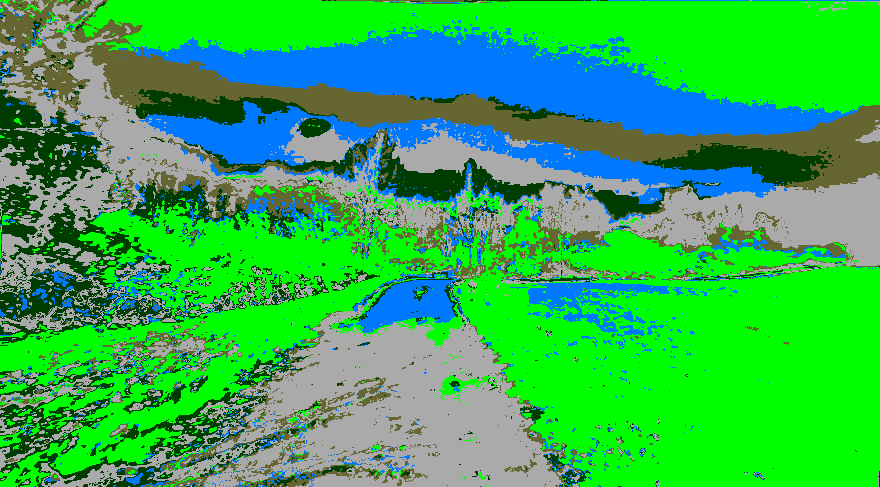

In [ ]:
lab_desc_name = "/content/segmentation_lab_desc.png"
gt_img = cv2.imread(lab_desc_name)
lab_image = translate_from_gt_to_rgb(gt_img, save=True, name="lab_desc")
cv2_imshow(lab_image)

In [ ]:
true_labels =  cv2.imread(pixel_labels)
get_accuracy(true_labels, lab_image)

Accuracy: 


47.306561508306885

### Test for a different image

In [ ]:
GT_VALUES = [0, 1, 2, 3, 4]
# An example of how I use it
img_label_list = []
for i in GT_VALUES:
    img  = cv2.imread(f"pixel_{i}_img.png")
    img_label_list.append(img)
features_list = []
desc = RGBHistogram([8, 8, 8])
for el in img_label_list:
    features_list.append(desc.describe(el))
segmentation = segmentate_using_descriptors(hypercubes_list[0], desc, features_list, save=True, name="rgb_desc")

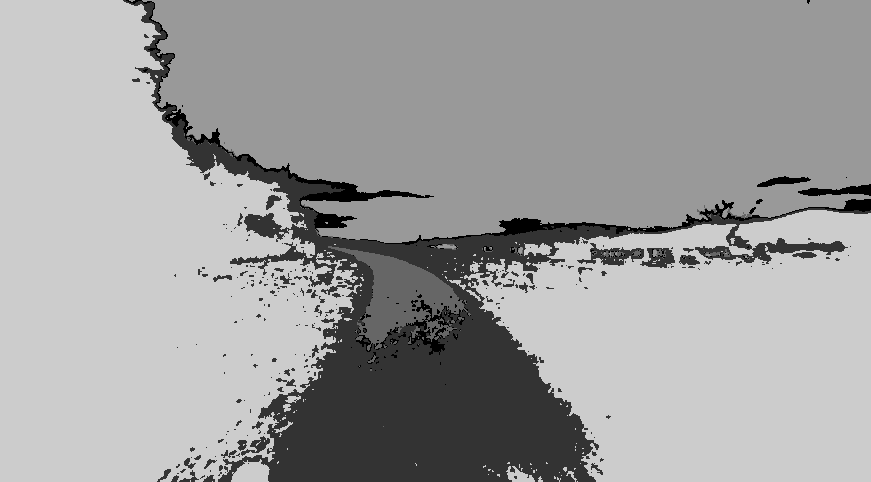

In [ ]:
cv2_imshow(segmentation*255/5)

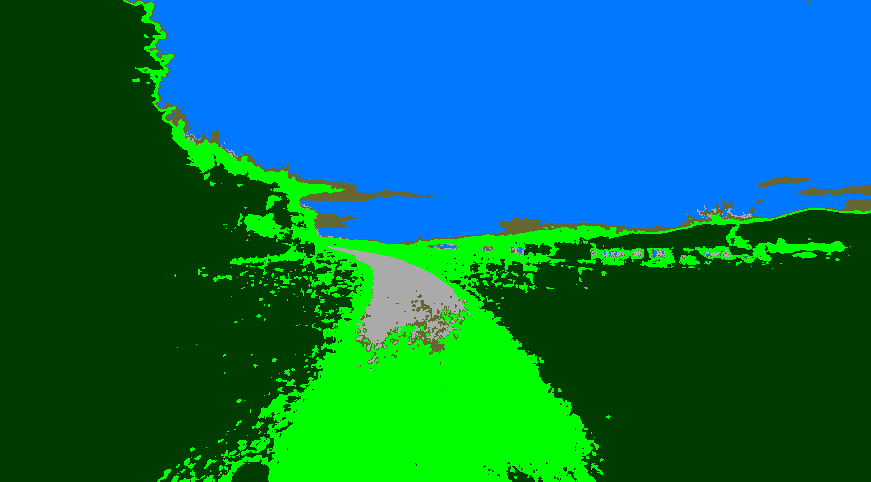

In [ ]:
rgb_desc_name = "/content/segmentation_rgb_desc.png"
gt_image = cv2.imread(rgb_desc_name)
rgb_image = translate_from_gt_to_rgb(gt_image, save=True, name="rgb_desc")
cv2_imshow(rgb_image)

In [ ]:
true_labels =  cv2.imread(pixel_labels)
get_accuracy(true_labels, rgb_image)

Accuracy: 


48.87666677782489

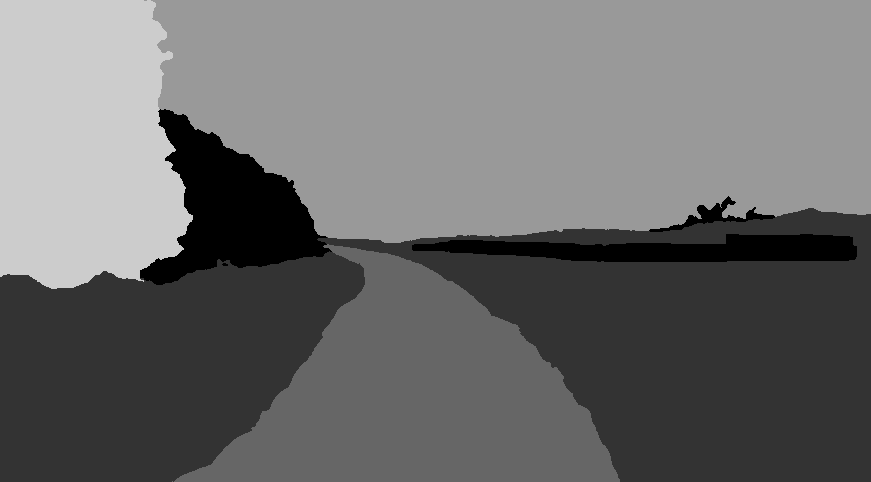

In [ ]:
cv2_imshow(hypercubes_list[0][:,:,-1]*255/5)

I haven't run this here but it should work. It is similar at what you did for accuracy

In [ ]:
def f1_metric(true, predictions, average=None):
   f1 = f1_score(true, predictions, average=average)
   return f1

def get_classification_report(true, predictions, digits=3):
   class_report = classification_report(true, predictions, digits=digits)
   return class_report

In [ ]:
ideal_gt = cv2.imread("src/datasets/train/GT_color/b1-99445_mask.png")
segmented_gt = cv2.imread("src/datasets/results/img_gt_lab_desc.png")
ideal_gt = HypercubeTools.create_gt_for_images(ideal_gt)
segmented_gt = HypercubeTools.create_gt_for_images(segmented_gt)
class_report = classification_report(ideal_gt.flatten(), segmented_gt.flatten(), digits=3)
print(class_report)

In [ ]:
ideal_gt = cv2.imread("src/datasets/train/GT_color/b1-99445_mask.png")
segmented_gt = cv2.imread("src/datasets/results/img_gt_lab_desc.png")
ideal_gt = HypercubeTools.create_gt_for_images(ideal_gt)
segmented_gt = HypercubeTools.create_gt_for_images(segmented_gt)
f1_score = f1_metric(ideal_gt.flatten(), segmented_gt.flatten(), average='weighted')
self.assertIsNotNone(f1_score)

## 4 - Neural network  

In [ ]:
from sklearn.preprocessing import LabelBinarizer

y = torch.tensor(LabelBinarizer().fit_transform(train_df.airline_sentiment))
y = y.type(torch.FloatTensor)
X = torch.tensor(train_df['text'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True)
X_train = X_train.squeeze()
X_test = X_test.squeeze()
y_train.type()

In [ ]:
import torch
from torch import nn

In [ ]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        #self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(100, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 3)
        )

    def forward(self, x):
        #x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model_sentiment = NeuralNetwork().to(device)
print(model_sentiment)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_sentiment.parameters(), lr=1e-3)

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

def train(x, y, model, loss_fn, optimizer):
    size = x.size()[0]
    model.train()
    for i, el in enumerate(x):
        X, lab = x[i].to(device), y[i].to(device)
        # Compute prediction error
        pred = model_sentiment(X)
        loss = loss_fn(pred, lab)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % size == 0:
            loss, current = loss.item(), (i + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
test_acc = []
test_losses = []
def test(x, y, model, loss_fn):
    size = x.size()[0]
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for i, el in enumerate(x):
            X, lab = x[i].to(device), y[i].to(device)
            pred = model_sentiment(X)
            test_loss += loss_fn(pred, lab).item()
            correct += (pred.argmax() == y[i].argmax()).type(torch.float).sum().item()
    correct /= size
    test_acc.append(correct)
    test_losses.append(test_loss)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
def train(X, model, loss_fn, optimizer):
    device = get_device()
    size = X.shape[0]
    X = torch.from_numpy(X)
    model.train()
    for i in range(size):
        x, gt = X[:-1, i].to(device), X[-1, i].to(device)
        # Compute prediction error
        pred = model(x.float())
        loss = loss_fn(pred, gt.long())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 10000 == 0:
            loss, current = loss.item(), (i + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
y = torch.from_numpy(LabelBinarizer().fit_transform(X[-1, :]))